In [2]:
import pandas as pd
import numpy as np

In [8]:
dataset = pd.read_csv('insurance_pre.csv')
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [9]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [13]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [ ]:
# Independent variables (features) and dependent variable (target)
indep = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dep = dataset[['charges']]
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(indep, dep, test_size=1/3, random_state=0)
# Fitting a linear regression model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
# Predicting the test set results
Y_pred = regressor.predict(X_test)

R2 Score: 0.7865108093853883


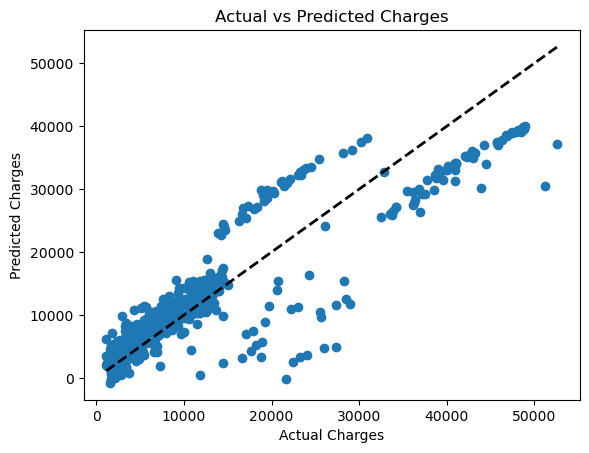

Predicted Charges for example data: 4690.7955019172805


In [ ]:
# validating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('R2 Score:', r2_score(Y_test, Y_pred))
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.show()
# Save the model using pickle
import pickle
filename="multiple_linear.sav"
pickle.dump(regressor,open(filename,"wb"))
model=pickle.load(open(filename,"rb"))
# Example prediction
example_data = pd.DataFrame({
    'age': [30],
    'bmi': [25.0],
    'children': [2],
    'sex_male': [True],        # Use boolean as in training data
    'smoker_yes': [False]      # Use boolean as in training data
})[indep.columns]  # Ensure correct column order

result = model.predict(example_data)
print("Predicted Charges for example data:", result[0][0])